# Monk Dataset Benchmark

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import warnings
from neural.network import Classifier

warnings.filterwarnings("ignore")

train = pd.read_csv(f"../datasets/monks_train1.csv")
X_train = train[["a1", "a2", "a3", "a4", "a5", "a6"]].to_numpy()
y_train = train["class"].to_numpy()

test = pd.read_csv(f"../datasets/monks_test1.csv")
X_test = test[["a1", "a2", "a3", "a4", "a5", "a6"]].to_numpy()
y_test = test["class"].to_numpy()

train

,class,a1,a2,a3,a4,a5,a6,ID
0,1,1,1,1,1,3,1,data_5
1,1,1,1,1,1,3,2,data_6
2,1,1,1,1,3,2,1,data_19
3,1,1,1,1,3,3,2,data_22
4,1,1,1,2,1,2,1,data_27
...,...,...,...,...,...,...,...,...
119,1,3,3,2,1,4,2,data_416
120,1,3,3,2,3,1,2,data_426
121,1,3,3,2,3,2,2,data_428
122,1,3,3,2,3,3,2,data_430


In [ ]:
topology = (8,)
activation = "relu"
learning_rate = 0.03
max_iter = 500

net = Classifier(
    hidden_layer_sizes=topology,
    activation=activation,
    learning_rate=learning_rate,
    max_iter=max_iter,
)

mlp = MLPClassifier(
    hidden_layer_sizes=topology,
    activation=activation,
    solver="sgd",
    learning_rate_init=learning_rate,
    max_iter=max_iter,
)

net.fit(X_train, y_train)
mlp.fit(X_train, y_train)
print(f"network loss: {net.loss:.2f}")
print(f"sklearn loss: {mlp.loss_:.2f}")

network loss: 0.25
sklearn loss: 0.54


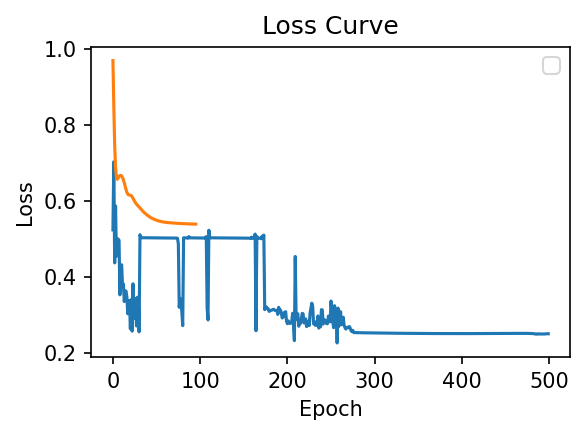

In [ ]:
plt.figure(figsize=(4, 3), dpi=150)
plt.title("Loss Curve")
plt.plot(net.loss_curve)
plt.plot(mlp.loss_curve_)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

net_pred = np.asarray([net.predict(x) for x in X_train])
accuracy = accuracy_score(y_train, net_pred)
print(f"network train accuracy: {accuracy:.2f}")

mlp_pred = mlp.predict(X_train)
accuracy = accuracy_score(y_train, mlp_pred)
print(f"sklearn train accuracy: {accuracy:.2f}")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:

net_pred = np.asarray([net.predict(x) for x in X_test])
accuracy = accuracy_score(y_test, net_pred)
print(f"network test accuracy: {accuracy:.2f}")

mlp_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, mlp_pred)
print(f"sklearn test accuracy: {accuracy:.2f}")

network test accuracy: 0.94
sklearn test accuracy: 0.87
